# Train a Decision Tree for the Moons Dataset

 #### Generate a moons dataset using make_moons(n_samples=10000, noise=0.3, random_state=42).

[[-0.15171227 -0.26941422]
 [-0.61817507  0.09464379]
 [-0.10232288 -0.432458  ]
 [-0.5060461   0.10271609]] [0 0 1 1]


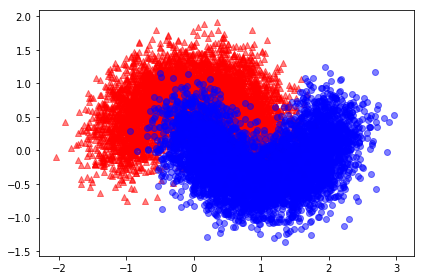

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise = 0.3, random_state=42)

# print(X[y == 0, 0],len(X[y == 0, 0]),type(X[y == 0, 0]))
# print(X[y == 0, 1],len(X[y == 0, 1]))
# print(y[y==0],len(y[y==0]))

print(X[[1,3,5,7]],y[[1,3,5,7]])

# plt.scatter("x-axis array","y-axis array")
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()



#### Split it into a training set and a test set using train_test_split(). Make your test set 20% of the dataset. Also, set random_state=42 for the train_test_split.

In [3]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=0.2, 
#                      stratify=y,
#                      random_state=42)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     random_state=42)

#### Use grid search with cross validation to find hyperparameter values for a DecisionTreeClassifier. (from sklearn.model_selection import GridSearchCV)

#### - GridSearchCV will help with the grid search cross validation. Hint: Try different values of max_leaf_nodes and ‘min_samples_split’. Use the .best_estimator_attribute to output the 'best' combination of given parameters from the grid search. Report the optimal values of the hyperparameters found, e.g., max leaf nodes and min samples split.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# cvint, cross-validation generator or an iterable

gs = GridSearchCV(estimator=DecisionTreeClassifier( random_state=42),
param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],'min_samples_split':[1.0, 2, 5, 10]}],
scoring='accuracy', cv=2)

gs = gs.fit(X_train,y_train)
print(gs.best_score_)

clf = gs.best_estimator_
print(gs.best_params_)

# scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
# print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


0.904375
{'max_depth': 6, 'min_samples_split': 2}


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

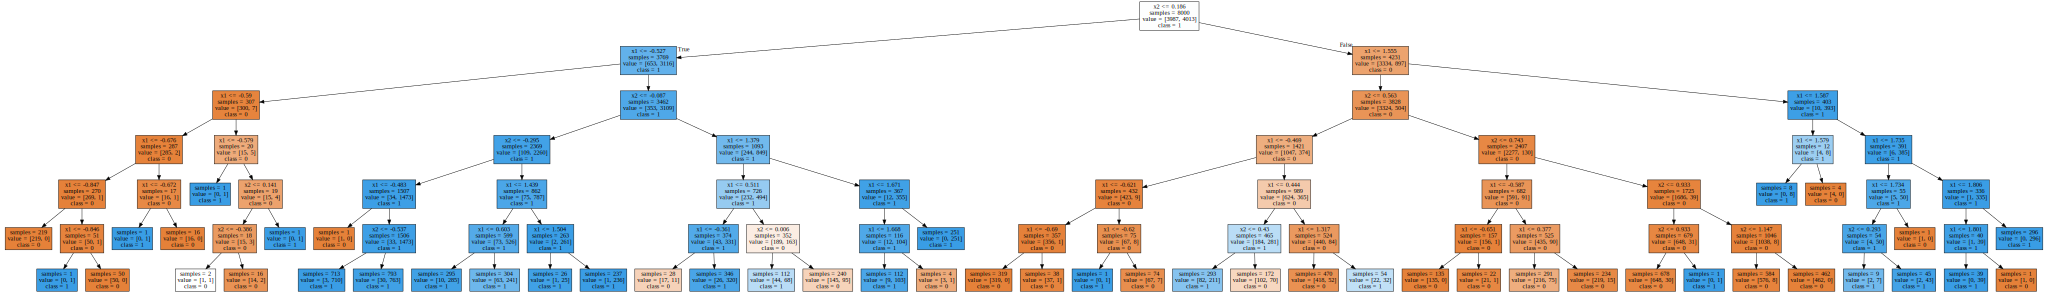

In [6]:
from sklearn.tree import export_graphviz
from adspy_shared_utilities import plot_decision_tree

plot_decision_tree(clf, ['x1','x2'], ['0','1'])

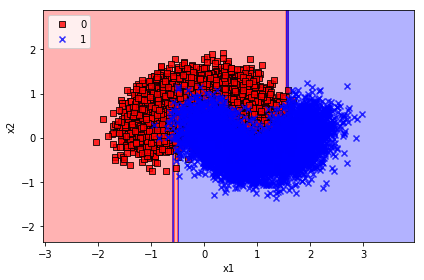

In [7]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=clf)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### Train it on the full training set using these hyperparameters and report your model’s classification performance on the test set. You can use accuracy_score() from sklearn.metrics to report the test set performance.

In [8]:
# Check the results using metrics
from sklearn import metrics
y_pred = clf.predict(X_test)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))
metrics.confusion_matrix(y_pred, y_test).tolist()[0][0]

from sklearn.metrics import classification_report
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))

confusion_matrix: 
[[934  79]
 [ 74 913]]

classification_report:
              precision    recall  f1-score   support

          0       0.93      0.92      0.92      1013
          1       0.92      0.93      0.92       987

avg / total       0.92      0.92      0.92      2000



# Grow a random forest on the Moons Dataset (28 pts total)

#### Continuing the previous exercise (problem 2), generate 1,000 subsets of the training set, each containing 100 instances selected randomly (hint: use ShuffleSplit class for this in Scikit-learn).

<br>
<br>

In [9]:
# ShuffleSplit, https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html

from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1000, train_size=0.0125, test_size=0, random_state=42)

print(rs)
print("")

for train_index, test_index in list(rs.split(X_train))[:1]:
    print("TRAIN:", len(X_train[[train_index]]), "TEST:", len(X_train[[test_index]]), "y_TRAIN:", len(y_train[[train_index]]), "y_TEST:", len(y_train[[test_index]]), "\n\n")
    print("TRAIN:", X_train[[train_index]], "TEST:", X_train[[test_index]], "y_TRAIN:", y_train[[train_index]], "y_TEST:", y_train[[test_index]], "\n\n")



ShuffleSplit(n_splits=1000, random_state=42, test_size=0, train_size=0.0125)

TRAIN: 100 TEST: 0 y_TRAIN: 100 y_TEST: 0 


TRAIN: [[ 1.4173795  -0.63937906]
 [ 0.95441214  0.48305069]
 [ 0.54367036  1.0361872 ]
 [ 2.3775698   0.45871384]
 [-0.30648833  1.39403637]
 [ 1.30588321 -0.25769253]
 [ 0.35180007  0.20290003]
 [ 0.4229109  -0.28236078]
 [ 0.13362528 -0.13112188]
 [-0.03207979  0.01633162]
 [ 0.73517963 -0.60452331]
 [-0.24783314  1.11169456]
 [ 1.2901793  -0.45445719]
 [ 0.67273149  1.13289669]
 [ 0.4861872   0.27134624]
 [ 0.26540256 -0.09546732]
 [ 0.20969686 -0.65842988]
 [-0.16032609  1.10546645]
 [-0.69365184  0.68176992]
 [-0.90434016  1.29821308]
 [-0.83256959  1.20394664]
 [ 0.7109435  -0.28485768]
 [ 0.95334329 -0.95329459]
 [-1.31286121  0.5463919 ]
 [ 0.89071029  0.36886726]
 [ 0.79326221 -0.45541042]
 [ 0.91429871  0.66092335]
 [ 1.58545213 -0.03260555]
 [ 1.95749712 -0.28410425]
 [ 1.80254052  0.37585088]
 [ 1.54241839 -0.48155373]
 [ 0.83296176  1.24235914]
 [-0.7

<br>
#### Train one Decision Tree on each subset, using the best hyperparameter values found in Problem (2). Evaluate these 1,000 decision trees on the test set. Print the average score over the 1000 classifiers. Is the average score of the 1000 classifiers higher or lower than the single classifier in part 2d?
#### Why? Hint: for each decision tree to have the best hyperparameters found above, use the clone function
####  “from sklearn.base import clone
#### forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]“

In [62]:
from sklearn.tree import DecisionTreeClassifier
# {'max_depth': 6, 'min_samples_split': 2} from question 2
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from statistics import mean

trained_model_list = []
for train_index, test_index in list(rs.split(X_train)):
#     print("TRAIN:", len(X_train[[train_index]]), "TEST:", len(X_train[[test_index]]), "y_TRAIN:", len(y_train[[train_index]]), "y_TEST:", len(y_train[[test_index]]), "\n\n")
#     print("TRAIN:", X_train[[train_index]], "y_TRAIN:", y_train[[train_index]], "\n\n")
    clf_trained = clone(gs.best_estimator_).fit(X_train[[train_index]],y_train[[train_index]])
    trained_model_list.append(clf_trained)

accuracy_list = []
for model_el in trained_model_list:
    y_pred = model_el.predict(X_test)
    acs = accuracy_score(y_test,y_pred)
    accuracy_list.append(acs)

print("mean_accuracy_score_of_1000_decision_trees: {}".format(mean(accuracy_list)))
# the average score is lower than the single classifier

mean_accuracy_score_of_1000_decision_trees: 0.8666195


#### For each test set instance, generate the predictions of the 1,000 Decision Trees and keep only the most frequent prediction. This give you a majority-vote prediction over the test set. Use from scipy.stats import mode() to help achieve this.

A hint from Proffessor
<br>
<br>
The 1000 decision tree models are the same ones that I got in the previous question by using ShufleSplit?
<br>
#### Train one Decision Tree on each {x,y} subset obtained from the shufflesplit. Each decision tree is trained on 100 data points (each subset is 100 points), thus you have 1000 decision trees in the end.
<br>
If so, because 100 instances in each of 1000 sets are shuffled, how can I do majority vote by using mode() for each instance?
#### You test the 1000 decision trees learned on each test point and keep a list of their output. Then you take the mode of the 1000 decision tree predictions to do majority vote and assign the final prediction for each point. If 750 trees predict A and 250 trees predict B, then the majority vote is A.

In [53]:
import statistics

majority_vote_pred_list = []
for X_test_el in X_test:
    pred_list_per_sample = []
    for model_el in trained_model_list:
        y_pred = model_el.predict([X_test_el])
        pred_list_per_sample.append(list(y_pred)[0])
    majority_vote_pred_list.append(statistics.mode(pred_list_per_sample))
print(majority_vote_pred_list)



[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 

#### Evaluate these predictions on the test set using accuracy_score(). You should see the performance of this random forest classifier do better than in part 3b.

In [57]:
print("accuracy_score_with_RandomForest: {}".format(accuracy_score(y_test,majority_vote_pred_list)))
    
# Got much better accuracy_score with random forest classifier!!!

accuracy_score_with_RandomForest: 0.927
